In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = shuffle(X_train)
X_test = shuffle(X_test)
y_train = shuffle(y_train)
y_test = shuffle(y_test)

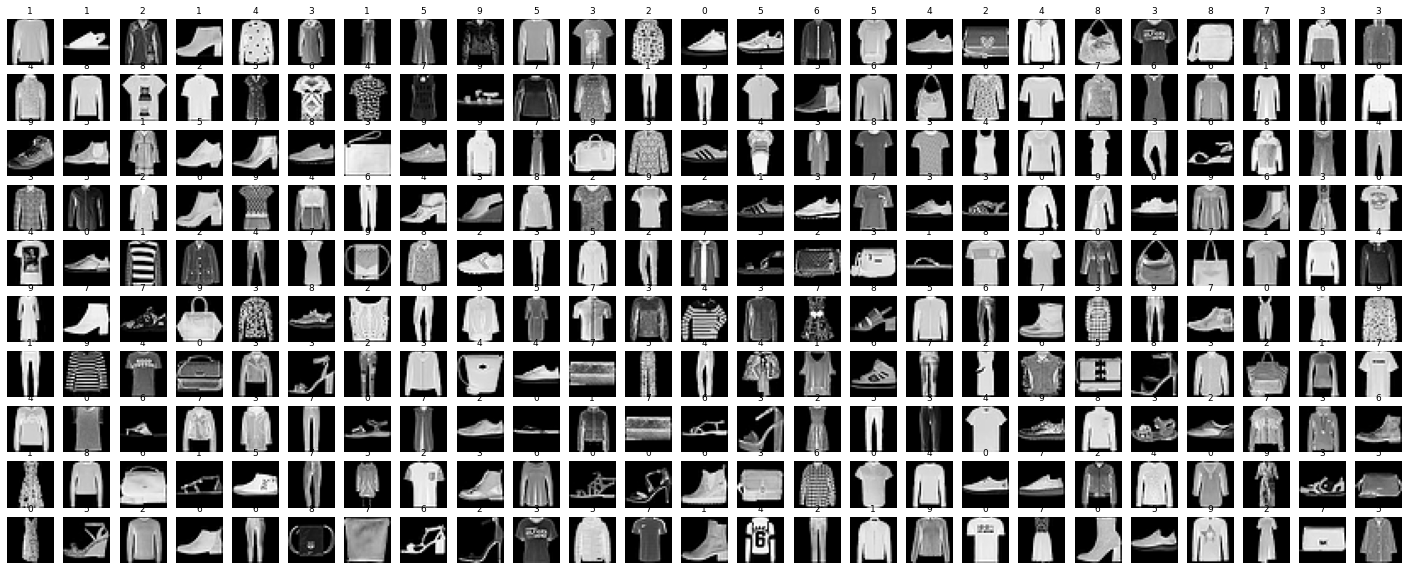

In [ ]:
# Define the dimensions of the plot grid 
W_grid = 25
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,10))

axes = axes.ravel()

n_training = len(X_train)

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize=9)
    axes[i].axis('off')

In [ ]:
# normalize data
X_train = X_train/255
X_test = X_test/255

In [ ]:
# add some noise
noise_factor = 0.3

noise_dataset = []

for img in X_train:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)
    
noise_dataset = np.array(noise_dataset)

noise_factor = 0.1
noise_test_dataset = []

for img in X_test:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

noise_test_dataset = np.array(noise_test_dataset)

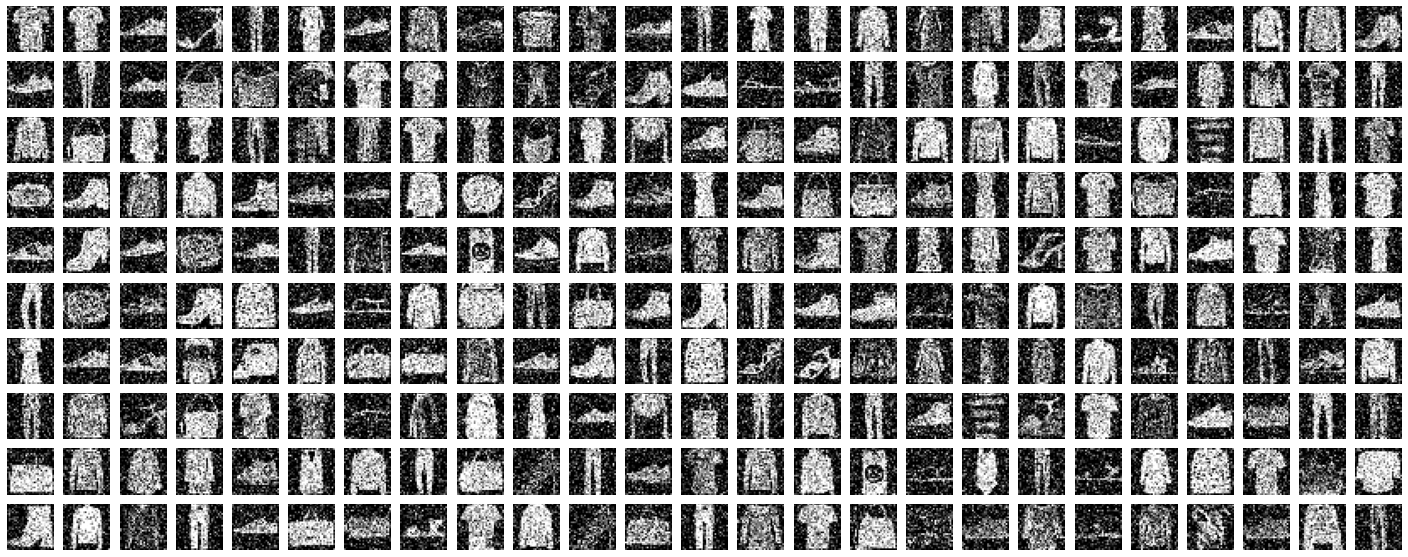

In [ ]:
# Define the dimensions of the plot grid 
W_grid = 25
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,10))

axes = axes.ravel()

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, 1000)
    axes[i].imshow(noise_dataset[index], cmap='gray')
    axes[i].axis('off')

In [ ]:
autoencoder = tf.keras.models.Sequential()
# Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, strides=2, padding='same', activation='relu', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, strides=2, padding='same', activation='relu'))

autoencoder.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, strides=1, padding='same', activation='relu'))
# Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 128, kernel_size = 3, strides=2, padding='same', activation='relu'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3, strides=2, padding='same', activation='relu'))

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         590080    
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      295040    
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        1153      
 ranspose)                                                       
                                                                 
Total params: 1,182,721
Trainable params: 1,182,721
Non-

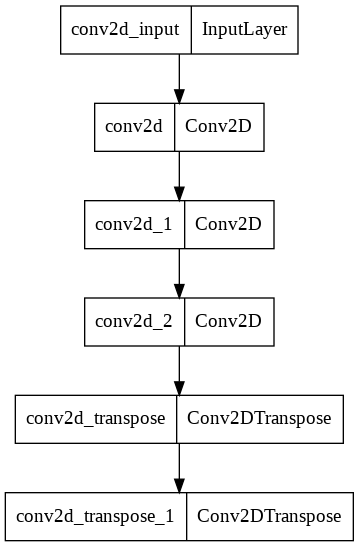

In [ ]:
tf.keras.utils.plot_model(
    autoencoder,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,
                              min_lr=0.00001, mode='auto')
callbacks = [reduce_lr]

autoencoder.compile(loss = 'mse', optimizer=tf.keras.optimizers.Adam(lr=0.001))
history = autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 32,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)),
               callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.0108 - val_loss: 0.0065 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0079 - val_loss: 0.0056 - lr: 0.0010
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0075 - val_loss: 0.0054 - lr: 0.0010
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0073 - val_loss: 0.0057 - lr: 0.0010
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0072 - val_loss: 0.0055 - lr: 0.0010
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0067 - val_loss: 0.0053 - lr: 1.0000e-04
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0067 - val_loss: 0.0054 - lr: 1.0000e-04
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0066 - val_loss: 0.0052 - lr: 1.0000e-05
Epoch 9/10
1875/1875 [==============================

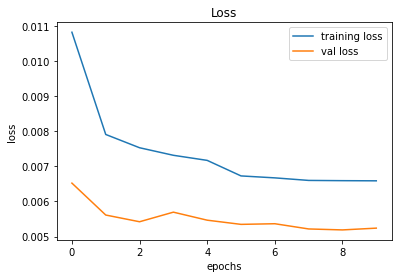

In [ ]:
# Plotting graphs for loss
plt.figure(0)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
autoencoder.save('IDN_Model_mnist.h5')
autoencoder_json = autoencoder.to_json()

In [ ]:
with open('IDN_model_mnist.json', 'w') as json_file:
  json_file.write(autoencoder_json)

In [ ]:
results = autoencoder.evaluate(noise_test_dataset, X_test)
print('val_loss', results)

313/313 [==============================] - 2s 7ms/step - loss: 0.0052
val_loss 0.005239576101303101


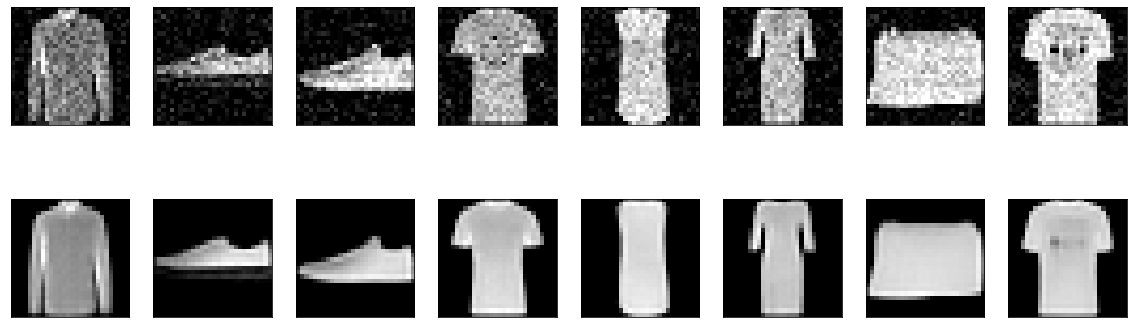

In [ ]:
predictions = autoencoder.predict(noise_test_dataset)
n = 8
plt.figure(figsize= (20,10))
for i in range(n):
  ax = plt.subplot(3, n, i+1)
  index = np.random.randint(0, len(noise_test_dataset))
  plt.imshow(noise_test_dataset[index], cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(3, n, i+1+n)
  plt.imshow(predictions[index].reshape(28,28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()